## Preparing the data

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

Loading the data:

In [22]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName + '*'))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, revMeans, revIntns = [],[],[],[]
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv*
['/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s1_2017-01-26_1545', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p11_s1_2017-02-08_1635', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p14_s1_2017-02-15_1115', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p3_s1_2017-01-31_1514', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p4_s2_2017-02-02_1303', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p5_s4_2017-02-07_1220', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p6_s4_2017-02-11_1549', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p0_s3_2017-01-31_1052', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p13_s1_2017-02-14_1637', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p15_s1_2017-02-15_1630', '/Users/ego

In [40]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = np.array(thisStair.reversalIntensities) #detectRevs(thisStair)
        theseRevIntns[theseRevIntns<-4] = np.nan
        print np.round(theseRevIntns,1)
        revIntns.append(theseRevIntns[-8:])
        revMeans.append([np.average(theseRevIntns[-4:]),
                         np.average(theseRevIntns[-6:]),
                         np.average(theseRevIntns[-8:])])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStair.extraInfo['startContr']]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s1_2017-01-26_1545
[-2.  -3.  -2.  -3.  -2.4 -3.  -1.2 -1.8 -1.2 -1.5]
[-1.  -2.  -1.  -2.  -1.4 -2.  -1.4 -2.  -1.7 -2. ]
[-2.  -1.  -3.  -1.  -2.2 -1.6 -2.8 -2.2 -2.5 -1.9]
[-3.  -1.  -2.  -1.  -2.2 -1.6 -2.2 -1.6 -1.9 -1.6]
[-1.  -2.  -1.  -2.  -1.4 -2.6 -1.4 -2.  -1.7 -2.6]
[-2.  -3.  -1.  -3.  -1.8 -2.4 -1.8 -2.4 -1.8 -2.4]
[-4.  -3.   nan -3.  -3.6 -3.  -3.6 -2.4 -2.7 -1.2]
[-4.  -1.  -3.  -2.  -2.6 -2.  -3.2 -2.6 -2.9 -2.3]
[-2.  -3.  -1.  -3.  -1.8 -2.4 -1.2 -1.8 -1.5 -1.8]
[-2.  -1.  -2.  -1.  -2.2 -1.6 -2.8 -1.6 -1.9 -1.6]
[-4.  -1.  -2.  -1.  -2.8 -2.2 -2.8 -2.2 -3.4 -2.5]
[-3.  -1.  -2.  -1.  -2.2 -1.6 -2.8 -2.2 -2.5 -1.3]
[-3.  -2.  -3.  -2.  -2.6 -2.  -2.6 -1.4 -2.3 -1.4]
[ nan -4.   nan -2.  -2.6 -1.4 -2.  -1.4 -2.6 -2. ]
[-2.  -1.  -2.  -1.  -2.2 -1.6 -2.8 -2.2 -2.5 -1.6]
[-3.  -1.  -3.  -2.  -2.6 -2.  -2.6 -1.4 -2.  -1.4]
[-3.  -1.  -2.  -1.  -2.2 -1.  -2.2 -1.  -1.9 -1.3]
[ nan  nan  nan  nan  nan 

In [24]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) + '_' + \
                      'tgV-' + stairs.targV.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(450, 30)
Index([u'dom', u'expName', u'expPara', u'fixCross', u'mcBsf', u'mcBv',
       u'mcPeriFade', u'mcPeriGap', u'mcSf', u'mcSz', u'meanRev6', u'nRevs',
       u'participant', u'session', u'stairLabel', u'stairMean', u'stairStart',
       u'targOri1', u'targOri2', u'targSf', u'targSz', u'targTpeak',
       u'targTtot', u'targV', u'targXoff1', u'targXoff2', u'targYoff', u'time',
       u'trialT', u'condLabel'],
      dtype='object')


,dom,expName,expPara,fixCross,mcBsf,mcBv,mcPeriFade,mcPeriGap,mcSf,mcSz,...,targSz,targTpeak,targTtot,targV,targXoff1,targXoff2,targYoff,time,trialT,condLabel
0,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.60,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0.0
1,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.01,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0.0
2,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,9.60,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-9.6_tgT-1.0_tgEcc-48_tgV-0.0
3,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.01,16,112,0.1,256,...,32,1.5,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0.0
4,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,9.60,16,112,0.1,256,...,32,0.5,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-0.0


In [25]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(450,)
(450,)
(450, 3)
(450, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2
0,0.60,0,-3,1.0,0.0,48
1,0.01,0,-3,1.0,0.0,48
2,9.60,0,0,1.0,0.0,48
3,0.01,0,0,1.5,0.0,48
4,9.60,0,-3,0.5,0.0,48


In [26]:
print np.shape(revMeans)
meanRevsDF = pd.DataFrame({
    'meanRevs4': np.array(revMeans)[:,0],
    'meanRevs6': np.array(revMeans)[:,1],
    'meanRevs8': np.array(revMeans)[:,2] })
orderedRevMeans = pd.concat([meanRevsDF, orderInfo], axis=1)
#orderedRevMeans.head(5)
stairsWithRevs = pd.merge(orderedRevMeans, stairs, on=['participant','mcBv','targTpeak',
                                                       'targXoff2', 'targV', 'stairStart'])
stairsWithRevs.head(5)

(450, 3)


,meanRevs4,meanRevs6,meanRevs8,mcBv,participant,stairStart,targTpeak,targV,targXoff2,dom,...,targOri1,targOri2,targSf,targSz,targTtot,targXoff1,targYoff,time,trialT,condLabel
0,-1.425,-1.85,-2.0125,0.60,0,-3,1.0,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0.0
1,-1.775,-1.75,-1.6875,0.01,0,-3,1.0,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0.0
2,-2.350,-2.20,-2.1500,9.60,0,0,1.0,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-9.6_tgT-1.0_tgEcc-48_tgV-0.0
3,-1.825,-1.85,-1.7625,0.01,0,0,1.5,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0.0
4,-1.925,-1.95,-1.8375,9.60,0,-3,0.5,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-0.0


In [27]:
condRevMeans = stairsWithRevs.groupby(['condLabel','participant'])['meanRevs4','meanRevs6','meanRevs8'].mean()
#print condRevMeans.head(6)
#print condRevMeans.index.get_level_values('participant')
#print condRevMeans.index
#condRevMeans['condLabel'] = condRevMeans.index
condRevMeans['participant'] = condRevMeans.index.get_level_values('participant')
condRevMeans['condLabel'] = condRevMeans.index.get_level_values('condLabel')
condRevMeans = condRevMeans.reset_index(drop=True)
print condRevMeans.shape
condRevMeans.head(6)

(225, 5)


,meanRevs4,meanRevs6,meanRevs8,participant,condLabel
0,-1.4500,-1.500000,-1.62500,0,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0
1,-1.8625,-1.775000,-1.76875,3,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0
2,-1.2000,-1.150000,-1.11250,4,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0
3,-2.0000,-1.916667,-1.81250,5,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0
4,-1.7000,-1.866667,-2.02500,6,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0
5,-1.7500,-1.900000,-1.92500,0,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5


In [28]:
stairsClean = stairs.drop(['stairStart','meanRev6','stairLabel'],axis=1,inplace=False)
stairsClean.drop_duplicates(inplace=True)
conds = pd.merge(condRevMeans, stairsClean, how='inner', on=['condLabel','participant'])
conds['Mask\nVelocity'] = np.round(conds.mcBv * 60/35,0)
print conds.columns
conds.head(7)

Index([u'meanRevs4', u'meanRevs6', u'meanRevs8', u'participant', u'condLabel',
       u'dom', u'expName', u'expPara', u'fixCross', u'mcBsf', u'mcBv',
       u'mcPeriFade', u'mcPeriGap', u'mcSf', u'mcSz', u'nRevs', u'session',
       u'stairMean', u'targOri1', u'targOri2', u'targSf', u'targSz',
       u'targTpeak', u'targTtot', u'targV', u'targXoff1', u'targXoff2',
       u'targYoff', u'time', u'trialT', u'Mask\nVelocity'],
      dtype='object')


,meanRevs4,meanRevs6,meanRevs8,participant,condLabel,dom,expName,expPara,fixCross,mcBsf,...,targSz,targTpeak,targTtot,targV,targXoff1,targXoff2,targYoff,time,trialT,Mask Velocity
0,-1.4500,-1.500000,-1.62500,0,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0,NaN,mc2_tgT-mcBv_peri,NaN,1,0.05,...,32,0.5,1,0.0,-104,104,0,2017-01-26_1252,2,0.0
1,-1.8625,-1.775000,-1.76875,3,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0,1.0,mc2_tgT-mcBv,peri,1,0.05,...,32,0.5,1,0.0,-104,104,0,2017-02-02_1206,2,0.0
2,-1.2000,-1.150000,-1.11250,4,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0,1.0,mc2_tgT-mcBv,peri,1,0.05,...,32,0.5,1,0.0,-104,104,0,2017-01-31_1642,2,0.0
3,-2.0000,-1.916667,-1.81250,5,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0,1.0,mc2_tgT-mcBv,peri,1,0.05,...,32,0.5,1,0.0,-104,104,0,2017-02-07_1116,2,0.0
4,-1.7000,-1.866667,-2.02500,6,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0,1.0,mc2_tgT-mcBv,peri,1,0.05,...,32,0.5,1,0.0,-104,104,0,2017-02-11_1444,2,0.0
5,-1.7500,-1.900000,-1.92500,0,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5,0.0,mc2_tgT-mcBv,mtn-p,1,0.05,...,32,0.5,1,3.5,-104,104,0,2017-01-31_1225,2,0.0
6,-1.9375,-1.958333,-1.50000,3,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5,1.0,mc2_tgT-mcBv,mtn-p,1,0.05,...,32,0.5,1,3.5,-104,104,0,2017-02-07_1306,2,0.0


In [29]:
#print conds.shape
dfStatCent = conds.ix[(conds.targXoff2==48) & (conds.targV==0)]
dfStatPeri = conds.ix[(conds.targXoff2==104) & (conds.targV==0)]
dfMtnCent = conds.ix[(conds.targXoff2==48) & (conds.targV==3.5)]
dfMtnPeri = conds.ix[(conds.targXoff2==104) & (conds.targV==3.5)]

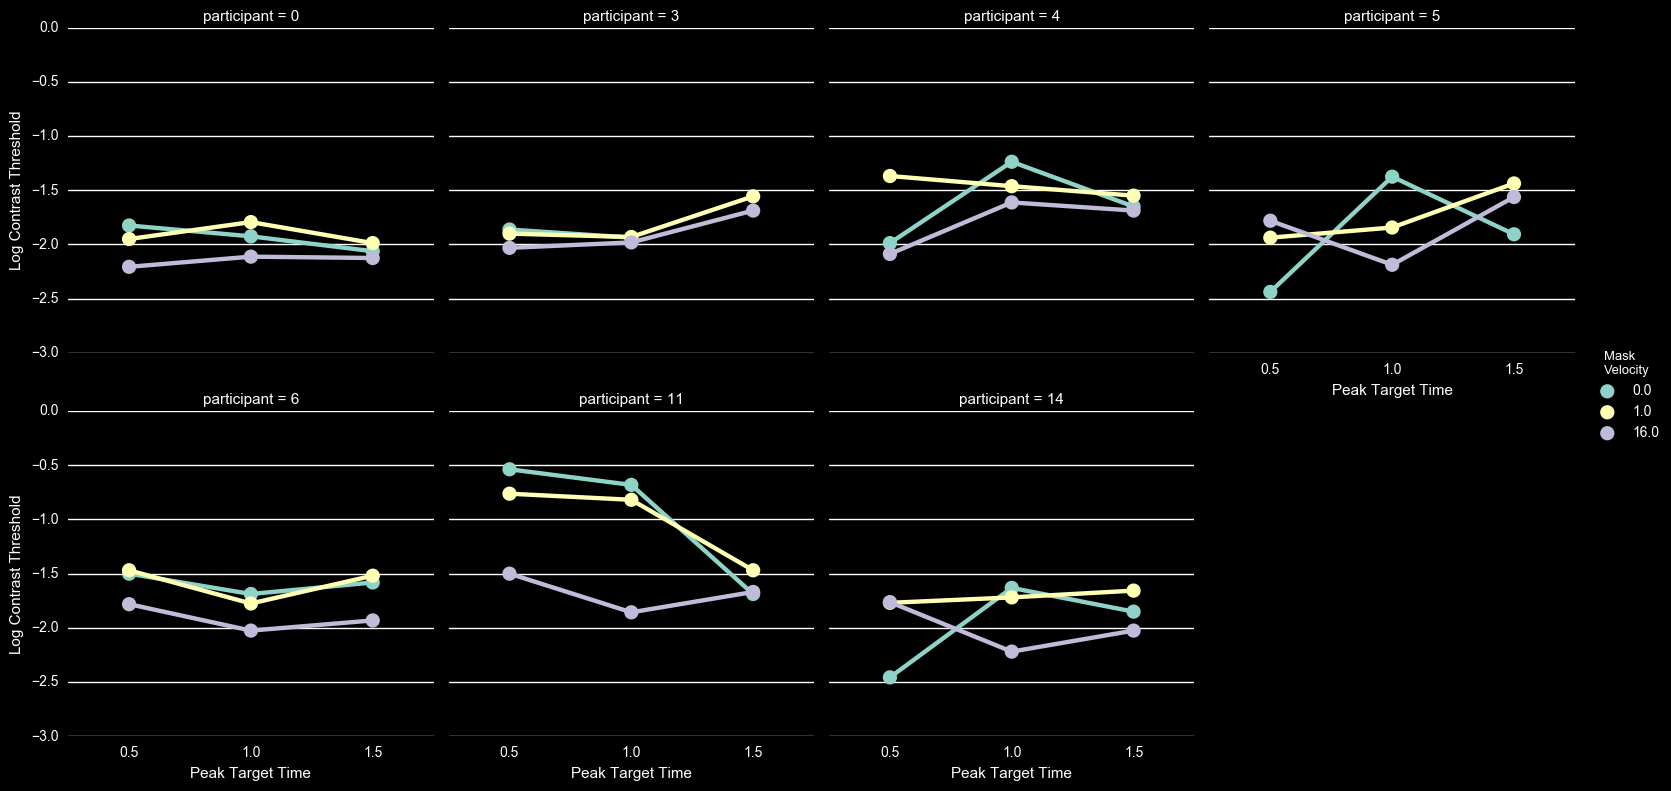

In [30]:
g = sns.factorplot(x='targTpeak', y='meanRevs8', hue='Mask\nVelocity', col='participant', col_wrap=4,
                   data=dfStatCent, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

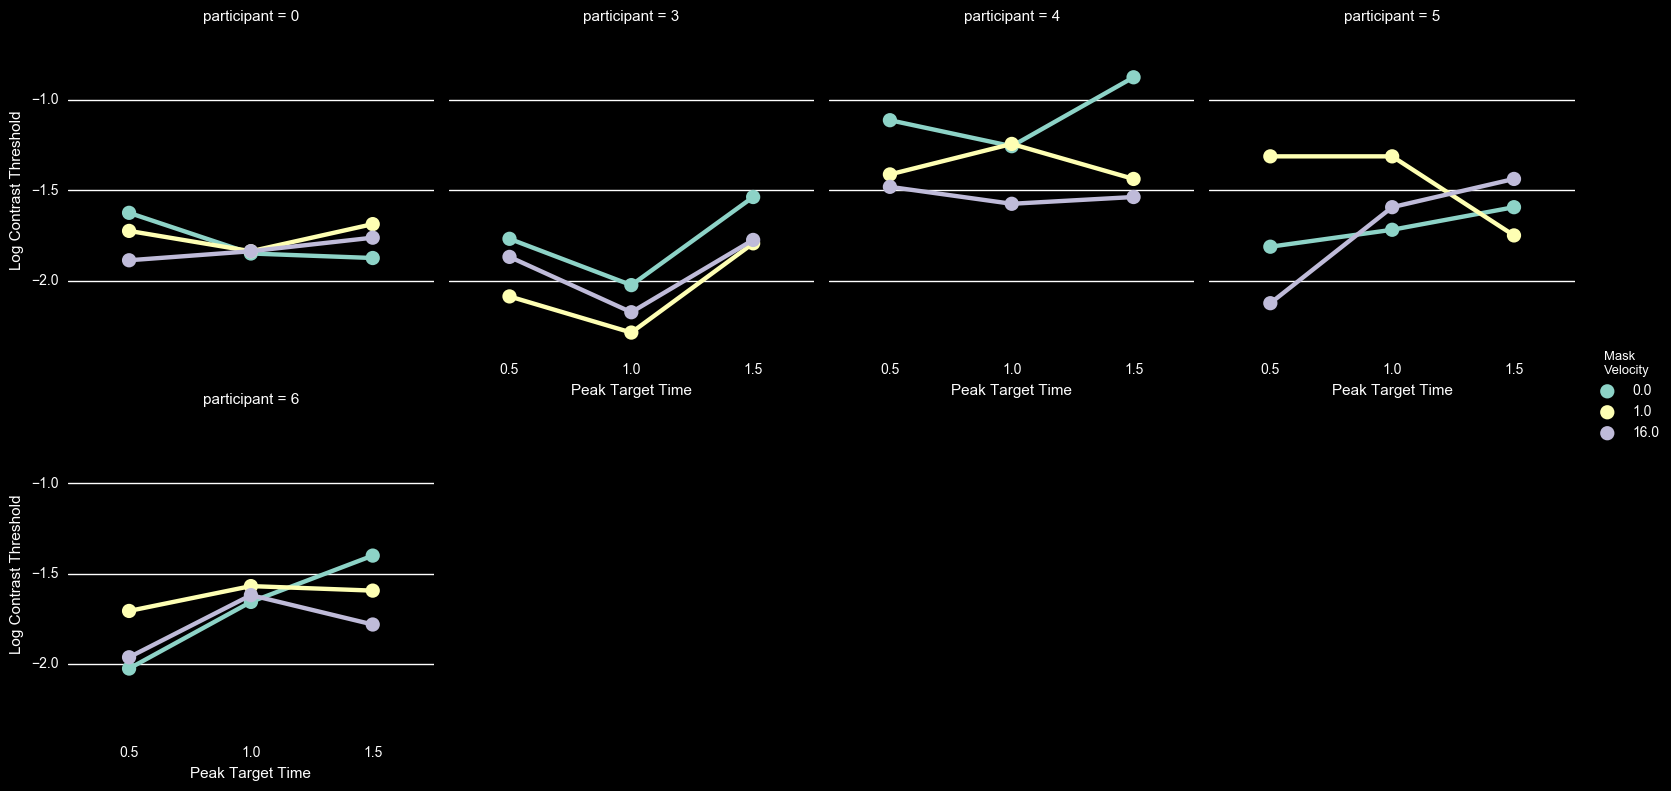

In [31]:
g = sns.factorplot(x='targTpeak', y='meanRevs8', hue='Mask\nVelocity', col='participant', col_wrap=4,
                   data=dfStatPeri, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

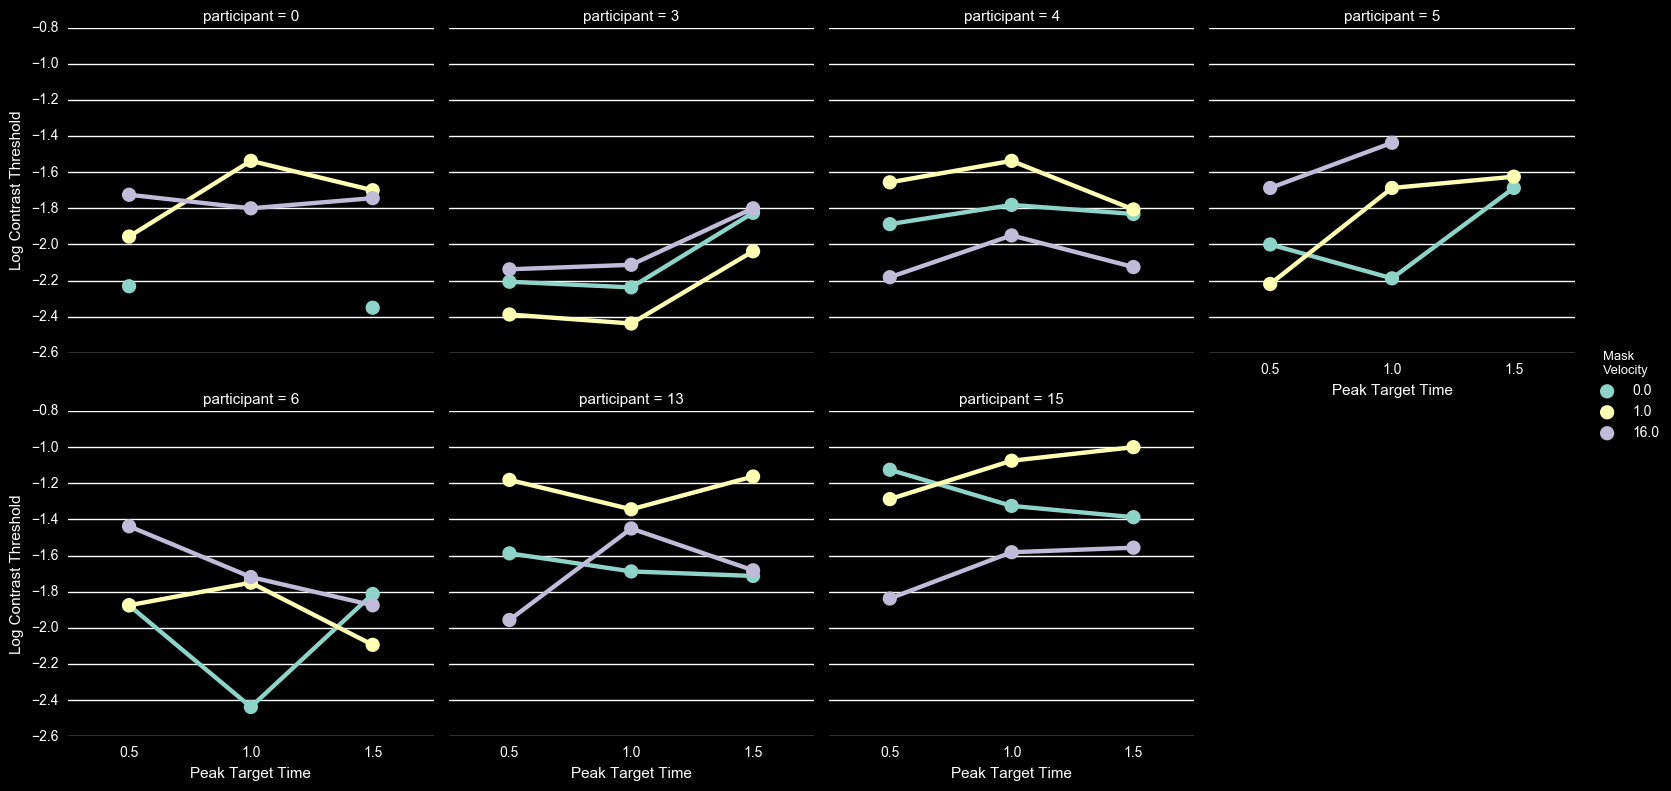

In [32]:
g = sns.factorplot(x='targTpeak', y='meanRevs8', hue='Mask\nVelocity', col='participant', col_wrap=4,
                   data=dfMtnCent, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

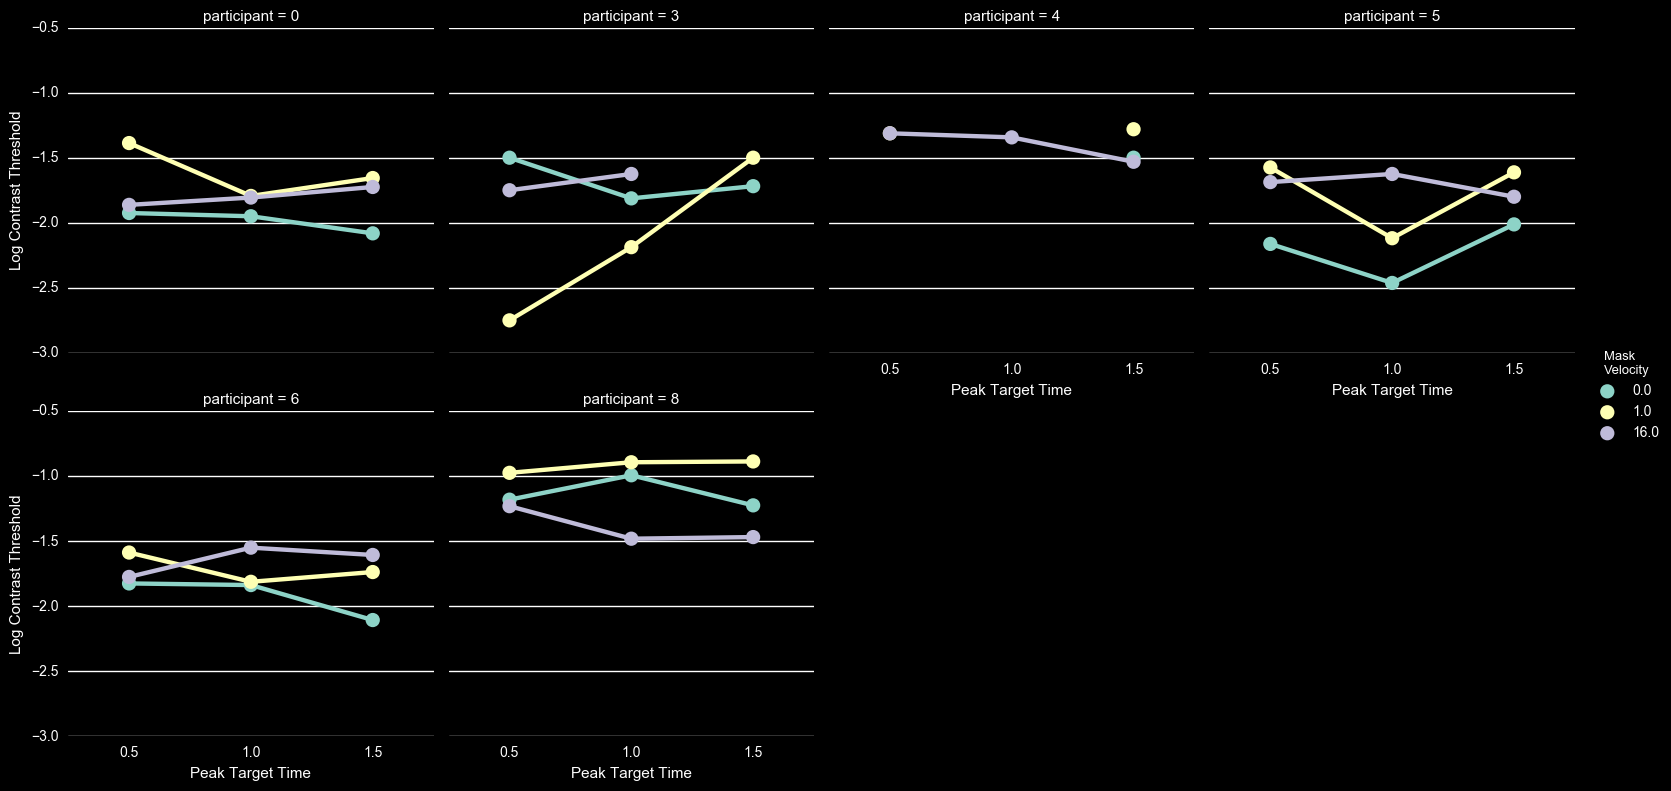

In [33]:
g = sns.factorplot(x='targTpeak', y='meanRevs8', hue='Mask\nVelocity', col='participant', col_wrap=4,
                   data=dfMtnPeri, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

(-2.3, -1.4)

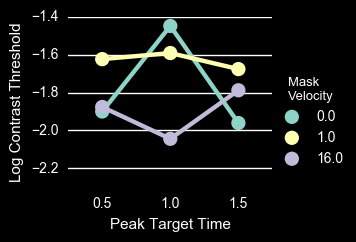

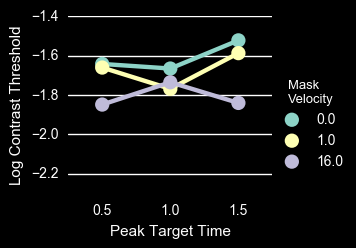

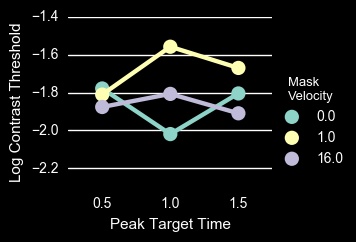

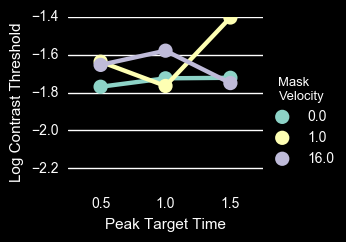

In [35]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask\nVelocity',  
                   data=dfStatCent, ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.4)
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask\nVelocity', 
                   data=dfStatPeri, ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.4)
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask\nVelocity', 
                   data=dfMtnCent, ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.4)
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask\nVelocity', 
                   data=dfMtnPeri, ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.4)

# Model testing

## Centering

In [36]:
# include the order of the reversal intensities
colNames = ['1','2','3','4','5','6','7','8']
revIntnsDF = pd.DataFrame(revIntns, columns=colNames)
#revIntnsDF.head(5)
#print revIntnsDF.head(5)
#print orderInfo.head(5)
#print revIntnsDF.shape
#print orderInfo.shape
ordRevIntns = revIntnsDF.join(orderInfo.reset_index(drop=True))
#print ordRevIntns.shape
#print ordRevIntns.head(5)
df = pd.melt(ordRevIntns, id_vars=['mcBv','participant','stairStart','targTpeak',
                                   'targV','targXoff2'], value_vars=colNames)
df = df.rename(columns={'variable': 'revN', 'value': 'revIntn'})
df.head(5)

,mcBv,participant,stairStart,targTpeak,targV,targXoff2,revN,revIntn
0,0.60,0,-3,1.0,0.0,48,1,-2.0
1,0.01,0,-3,1.0,0.0,48,1,-1.0
2,9.60,0,0,1.0,0.0,48,1,-3.0
3,0.01,0,0,1.5,0.0,48,1,-2.0
4,9.60,0,-3,0.5,0.0,48,1,-1.0


In [61]:
df0 = pd.DataFrame()
df0['participant'] = df.participant
df0['targEcc'] = (df.targXoff2 - 48)/(104-48) # 0=center, 1=peri
df0['targV'] = df.targV/np.max(df.targV) # 0=static, 1=dynamic
df0.ix[df.mcBv==.01, 'mcBv'] = 0 # 0=static mask; 1=slow mask; 2=fast mask
df0.ix[df.mcBv==0.6, 'mcBv'] = .5
df0.ix[df.mcBv==9.6, 'mcBv'] = 1
df0['targOnset'] = df.targTpeak - .5 # 0=onset in the beginning
df0['stairStart'] = (df.stairStart+3)/3 # 0=low start; 1=high start
df0['revN'] = df.revN
df0['revIntn'] = df.revIntn
df0.reset_index(drop=True, inplace=True)
df0.revIntn = df0.revIntn.interpolate()
df0.head(10)

,participant,targEcc,targV,mcBv,targOnset,stairStart,revN,revIntn
0,0,0.0,0.0,0.5,0.5,0.0,1,-2.0
1,0,0.0,0.0,0.0,0.5,0.0,1,-1.0
2,0,0.0,0.0,1.0,0.5,1.0,1,-3.0
3,0,0.0,0.0,0.0,1.0,1.0,1,-2.0
4,0,0.0,0.0,1.0,0.0,0.0,1,-1.0
5,0,0.0,0.0,1.0,0.5,0.0,1,-1.0
6,0,0.0,0.0,0.5,1.0,0.0,1,-2.0
7,0,0.0,0.0,1.0,0.0,1.0,1,-3.0
8,0,0.0,0.0,0.0,0.0,0.0,1,-1.0
9,0,0.0,0.0,0.0,0.0,1.0,1,-2.0


In [44]:
import statsmodels as sm
import statsmodels.formula.api as smf

The model with all three mask speeds.

In [63]:
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df0, missing='drop', groups=df0['participant'])
#print sm.stats.anova.anova_lm(md0,md)
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       3600         Method:                  REML      
No. Groups:             10           Scale:                   0.6258    
Min. group size:        144          Likelihood:              -4304.7297
Max. group size:        576          Converged:               Yes       
Mean group size:        360.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.506    0.120 -12.549 0.000 -1.741 -1.270
targEcc                      -0.021    0.098  -0.210 0.834 -0.212  0.171
targV                        -0.319    0.091  -3.512 0.000 -0.497 -0.141
targEcc:targV                 0.139    0.135   1.030 0.303 -0.126  0

In [64]:
#print dir(mdf)
#print mdf.params
mds = pd.DataFrame({
        'targV' : np.repeat([0,1],9),
        'mcBv' : np.tile(np.repeat([0,.5,1],3),2), 
        'targOnset' : np.tile(np.linspace(0,1,3),6)
    })
mds['contrast'] = mdf.params['Intercept'] + \
    mdf.params['targV']*mds.targV + \
    mdf.params['mcBv']*mds.mcBv + \
    mdf.params['targOnset']*mds.targOnset + \
    mdf.params['targV:targOnset']*mds.targV*mds.targOnset + \
    mdf.params['mcBv:targOnset']*mds.mcBv*mds.targOnset #+ \
    #mdf.params['targV:mcBv']*mds.targV*mds.mcBv + \
    #mdf.params['targV:mcBv:targOnset']*mds.targV*mds.mcBv*mds.targOnset
mds['targTpeak'] = mds.targOnset + 0.5
mds.ix[mds.mcBv==0, 'Mask\nVelocity'] = 0
mds.ix[mds.mcBv==.5, 'Mask\nVelocity'] = 1
mds.ix[mds.mcBv==1, 'Mask\nVelocity'] = 16
mds.head(5)

,mcBv,targOnset,targV,contrast,targTpeak,Mask Velocity
0,0.0,0.0,0,-1.505666,0.5,0.0
1,0.0,0.5,0,-1.578558,1.0,0.0
2,0.0,1.0,0,-1.651449,1.5,0.0
3,0.5,0.0,0,-1.631459,0.5,1.0
4,0.5,0.5,0,-1.656040,1.0,1.0


(-2.55, -1.2)

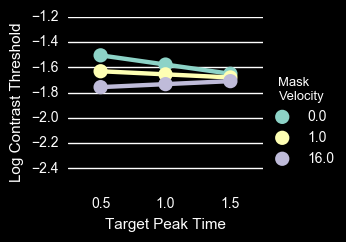

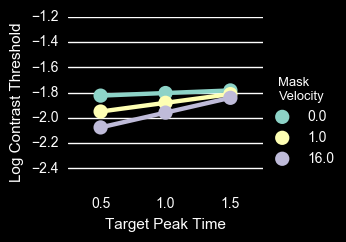

In [65]:
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds[mds.targV==0], ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
plt.ylim(-2.55,-1.2)
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds[mds.targV==1], ci=None, size=2.5, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
plt.ylim(-2.55,-1.2)

### Nonlinearities in mask speeds

A model with only static and fast masks.

In [66]:
df02 = df0.drop(df0[df0.mcBv==.5].index)
#df02.ix[df02.mcBv==2,'mcBv'] = 1
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df02, groups=df02['participant'])
mdf = md.fit()
print(mdf.summary())
df02.head(5)

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       2400         Method:                  REML      
No. Groups:             10           Scale:                   0.6288    
Min. group size:        96           Likelihood:              -2883.8268
Max. group size:        384          Converged:               Yes       
Mean group size:        240.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.650    0.111 -14.810 0.000 -1.868 -1.431
targEcc                       0.057    0.108   0.530 0.596 -0.154  0.268
targV                        -0.243    0.100  -2.423 0.015 -0.439 -0.046
targEcc:targV                 0.064    0.149   0.427 0.670 -0.229  0

,participant,targEcc,targV,mcBv,targOnset,stairStart,revN,revIntn
1,0,0.0,0.0,0.0,0.5,0.0,1,-1.0
2,0,0.0,0.0,1.0,0.5,1.0,1,-3.0
3,0,0.0,0.0,0.0,1.0,1.0,1,-2.0
4,0,0.0,0.0,1.0,0.0,0.0,1,-1.0
5,0,0.0,0.0,1.0,0.5,0.0,1,-1.0


A model with only static and slow masks.

In [67]:
df01 = df0.drop(df[df.mcBv==1].index)
df01.ix[df01.mcBv==.5,'mcBv'] = 1
df01.reset_index(drop=True, inplace=True)
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df01, groups=df01['participant'])
mdf = md.fit()
print(mdf.summary())
df01.head(5)

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       3600         Method:                  REML      
No. Groups:             10           Scale:                   0.6269    
Min. group size:        144          Likelihood:              -4308.9967
Max. group size:        576          Converged:               Yes       
Mean group size:        360.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.599    0.123 -12.977 0.000 -1.840 -1.357
targEcc                       0.070    0.107   0.657 0.511 -0.139  0.280
targV                        -0.265    0.099  -2.680 0.007 -0.459 -0.071
targEcc:targV                 0.064    0.148   0.431 0.666 -0.226  0

,participant,targEcc,targV,mcBv,targOnset,stairStart,revN,revIntn
0,0,0.0,0.0,1.0,0.5,0.0,1,-2.0
1,0,0.0,0.0,0.0,0.5,0.0,1,-1.0
2,0,0.0,0.0,1.0,0.5,1.0,1,-3.0
3,0,0.0,0.0,0.0,1.0,1.0,1,-2.0
4,0,0.0,0.0,1.0,0.0,0.0,1,-1.0


### Nonlinearities in target onsets

#### Early and late onset targets

In [68]:
df02 = df0.drop(df0[df0.targOnset==0.5].index)
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df02, groups=df02['participant'])
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       2400         Method:                  REML      
No. Groups:             10           Scale:                   0.6449    
Min. group size:        96           Likelihood:              -2914.6741
Max. group size:        384          Converged:               Yes       
Mean group size:        240.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.610    0.119 -13.521 0.000 -1.843 -1.376
targEcc                       0.087    0.109   0.800 0.424 -0.126  0.301
targV                        -0.149    0.101  -1.465 0.143 -0.348  0.050
targEcc:targV                -0.028    0.151  -0.188 0.851 -0.324  0

#### Early- and mid-onset targets

In [69]:
df01 = df0.drop(df0[df0.targOnset==1].index)
df01.ix[df01.targOnset==0.5,'targOnset'] = 1
#df01.reset_index(drop=True, inplace=True)
#dfC02.ix[dfC02.mcBv==2,'mcBv'] = 1
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df01, groups=df01['participant'])
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       2400         Method:                  REML      
No. Groups:             10           Scale:                   0.6156    
Min. group size:        96           Likelihood:              -2861.2025
Max. group size:        384          Converged:               Yes       
Mean group size:        240.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.605    0.134 -11.988 0.000 -1.867 -1.342
targEcc                       0.118    0.106   1.104 0.270 -0.091  0.326
targV                        -0.138    0.099  -1.388 0.165 -0.332  0.057
targEcc:targV                -0.046    0.148  -0.314 0.753 -0.336  0

#### Mid- and late-onset targets

In [70]:
df12 = df0.drop(df0[df0.targOnset==0].index)
df12.ix[df12.targOnset==0.5,'targOnset'] = 0
#df01.reset_index(drop=True, inplace=True)
#dfC02.ix[dfC02.mcBv==2,'mcBv'] = 1
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', df12, groups=df12['participant'])
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       2400         Method:                  REML      
No. Groups:             10           Scale:                   0.6077    
Min. group size:        96           Likelihood:              -2844.2591
Max. group size:        384          Converged:               Yes       
Mean group size:        240.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.383    0.119 -11.635 0.000 -1.616 -1.150
targEcc                      -0.185    0.106  -1.750 0.080 -0.392  0.022
targV                        -0.569    0.099  -5.771 0.000 -0.762 -0.376
targEcc:targV                 0.386    0.147   2.632 0.008  0.099  0

##### Mid- and late-onset targets: Model construction

In [71]:
print mdf.params
mds = pd.DataFrame({
        'targEcc' : np.repeat([0,1],12),
        'targV' : np.tile(np.repeat([0,1],6),2),
        'mcBv' : np.tile(np.repeat([0,1,2],2),4), 
        'targOnset' : np.tile(np.linspace(0,1,2),12)
    })
mds['contrast'] = mdf.params['Intercept'] + \
    mdf.params['targEcc']*mds.targEcc + \
    mdf.params['targV']*mds.targV + \
    mdf.params['targEcc:targV']*mds.targEcc*mds.targV + \
    mdf.params['mcBv']*mds.mcBv + \
    mdf.params['targEcc:mcBv']*mds.targEcc*mds.mcBv + \
    mdf.params['targV:mcBv']*mds.targV*mds.mcBv + \
    mdf.params['targEcc:targV:mcBv']*mds.targEcc*mds.targV*mds.mcBv + \
    mdf.params['targOnset']*mds.targOnset + \
    mdf.params['targEcc:targOnset']*mds.targEcc*mds.targOnset + \
    mdf.params['targV:targOnset']*mds.targV*mds.targOnset + \
    mdf.params['targEcc:targV:targOnset']*mds.targEcc*mds.targV*mds.targOnset + \
    mdf.params['mcBv:targOnset']*mds.mcBv*mds.targOnset + \
    mdf.params['targEcc:mcBv:targOnset']*mds.targEcc*mds.mcBv*mds.targOnset + \
    mdf.params['targV:mcBv:targOnset']*mds.targV*mds.mcBv*mds.targOnset + \
    mdf.params['targEcc:targV:mcBv:targOnset']*mds.targEcc*mds.targV*mds.mcBv*mds.targOnset
mds.ix[mds.mcBv==0, 'Mask\nVelocity'] = 0
mds.ix[mds.mcBv==1, 'Mask\nVelocity'] = 1
mds.ix[mds.mcBv==2, 'Mask\nVelocity'] = 16
mds.ix[mds.targOnset==0, 'targTpeak'] = 1
mds.ix[mds.targOnset==1, 'targTpeak'] = 1.5
mds.head()

Intercept                      -1.383348
targEcc                        -0.185068
targV                          -0.568984
targEcc:targV                   0.385950
mcBv                           -0.483223
targEcc:mcBv                    0.440838
targV:mcBv                      0.689913
targEcc:targV:mcBv             -0.475190
targOnset                      -0.372829
targEcc:targOnset               0.426264
targV:targOnset                 0.580314
targEcc:targV:targOnset        -0.597673
mcBv:targOnset                  0.589509
targEcc:mcBv:targOnset         -0.721268
targV:mcBv:targOnset           -0.840281
targEcc:targV:mcBv:targOnset    0.861854
stairStart                      0.143003
Intercept RE                    0.386466
dtype: float64


,mcBv,targEcc,targOnset,targV,contrast,Mask Velocity,targTpeak
0,0,0,0.0,0,-1.383348,0.0,1.0
1,0,0,1.0,0,-1.756178,0.0,1.5
2,1,0,0.0,0,-1.866571,1.0,1.0
3,1,0,1.0,0,-1.649892,1.0,1.5
4,2,0,0.0,0,-2.349794,16.0,1.0


(-2.3, -1.2)

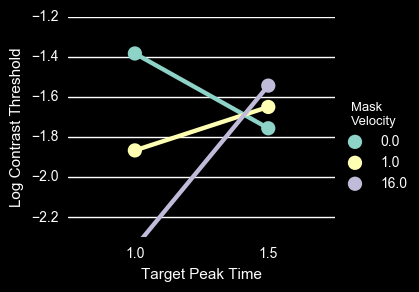

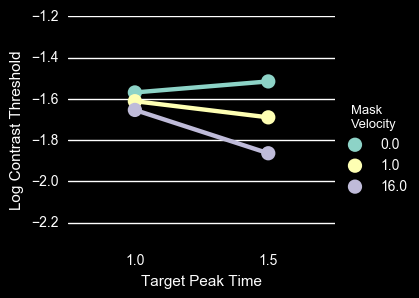

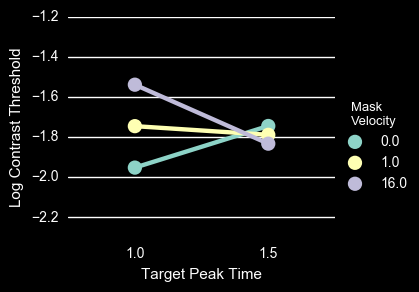

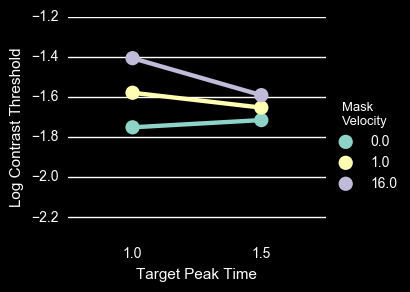

In [72]:
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds.ix[(mds.targV==0) & (mds.targEcc==0)], ci=None, size=3, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.2)
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds.ix[(mds.targV==0) & (mds.targEcc==1)], ci=None, size=3, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.2)
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds.ix[(mds.targV==1) & (mds.targEcc==0)], ci=None, size=3, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.2)
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask\nVelocity', 
                   data=mds.ix[(mds.targV==1) & (mds.targEcc==1)], ci=None, size=3, aspect=1.2)
g.set_axis_labels('Target Peak Time','Log Contrast Threshold')
plt.ylim(-2.3,-1.2)

## True centering

In [73]:
df.head()

,mcBv,participant,stairStart,targTpeak,targV,targXoff2,revN,revIntn
0,0.60,0,-3,1.0,0.0,48,1,-2.0
1,0.01,0,-3,1.0,0.0,48,1,-1.0
2,9.60,0,0,1.0,0.0,48,1,-3.0
3,0.01,0,0,1.5,0.0,48,1,-2.0
4,9.60,0,-3,0.5,0.0,48,1,-1.0


In [76]:
dfC = pd.DataFrame()
dfC['participant'] = df.participant
dfC['targEcc'] = ((df.targXoff2 - 48)/(104-48))*2-1 # 0=center, 1=peri
#dfC['targEcc'] = (df.targXoff2 - 76)/28 # -1=center, 1=peri
dfC['targV'] = 2*(df.targV/np.max(df.targV))-1 # 0=static, 1=dynamic
dfC.ix[df.mcBv==.01, 'mcBv'] = -1 # 0=static mask; 1=slow mask; 2=fast mask
dfC.ix[df.mcBv==0.6, 'mcBv'] = 0
dfC.ix[df.mcBv==9.6, 'mcBv'] = 1
dfC['targOnset'] = 2*(df.targTpeak - .5)-1 # 0=onset in the beginning
dfC['stairStart'] = (df.stairStart+1.5)/1.5 # -1=low start; 1=high start
dfC['revN'] = df.revN
dfC['revIntn'] = df.revIntn
dfC.revIntn = dfC.revIntn.interpolate()
dfC.head(10)

,participant,targEcc,targV,mcBv,targOnset,stairStart,revN,revIntn
0,0,-1.0,-1.0,0.0,0.0,-1.0,1,-2.0
1,0,-1.0,-1.0,-1.0,0.0,-1.0,1,-1.0
2,0,-1.0,-1.0,1.0,0.0,1.0,1,-3.0
3,0,-1.0,-1.0,-1.0,1.0,1.0,1,-2.0
4,0,-1.0,-1.0,1.0,-1.0,-1.0,1,-1.0
5,0,-1.0,-1.0,1.0,0.0,-1.0,1,-1.0
6,0,-1.0,-1.0,0.0,1.0,-1.0,1,-2.0
7,0,-1.0,-1.0,1.0,-1.0,1.0,1,-3.0
8,0,-1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0
9,0,-1.0,-1.0,-1.0,-1.0,1.0,1,-2.0


The model with all three mask speeds.

In [77]:
md = smf.mixedlm('revIntn ~ targEcc * targV * mcBv * targOnset + stairStart', dfC, groups=dfC['participant'])
#print sm.stats.anova.anova_lm(md0,md)
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      revIntn   
No. Observations:       3600         Method:                  REML      
No. Groups:             10           Scale:                   0.6258    
Min. group size:        144          Likelihood:              -4327.6035
Max. group size:        576          Converged:               Yes       
Mean group size:        360.0                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -1.611    0.102 -15.765 0.000 -1.811 -1.411
targEcc                       0.053    0.015   3.616 0.000  0.024  0.082
targV                        -0.052    0.015  -3.512 0.000 -0.080 -0.023
targEcc:targV                 0.018    0.015   1.257 0.209 -0.010  0